# BLOC n°2: Analyse exploratoire, descriptive et inférentielle de données

L'analyse exploratoire des données __des émissions de CO2e__ par __les véhicules électriques et thermiques__ représente une étape fondamentale dans notre projet 

# Contexte:
On veut creer une application de prédiction d’émission de GES pour les véhicules électriques. </br>
En pratique:  </br>
- L'utilisateur s’identifie et saisit les caractéristiques du véhicule,   </br>
- l'application renvoie la prédiction de GES émis 

Les informations principales sont les suivantes :</br>
- Catégorie du véhicule</br>
- Marque</br>
- Pays</br>
- Masse en ordre de marche (kg)</br>
- Émissions spécifiques de CO2 </br>
- Dimensions du véhicule</br>
- Consommation d'énergie électrique (Wh/km)</br>
- Année d’immatriculation

A cela s’ajouteront des données issues de différentes sources concernant les émissions de GES de la production de l’énergie électrique. </br>
Ces données sont essentielles pour former le modèle de prédiction et fournir des estimations précises de la quantité de GES émis par un véhicule donné en fonction de ses caractéristiques</br>

![](https://github.com/boson-alpha-kplr/rncp/blob/main/maquete%20de%20l'application.png?raw=true)

## Plan:

**ÉTAPE 1 : Connexion à la base de données** <br>
**ÉTAPE 2 : Analyse exploratoire** <br>
**ÉTAPE 3 : Analyse descriptive**  <br>
**ÉTAPE 4 : Analyse inférentielle** 




## Importation de dépendences 

In [0]:
!pip install missingno

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-15bcad73-bc19-4345-a864-7295b2a0445b/bin/python -m pip install --upgrade pip' command.


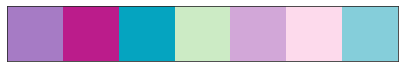

In [0]:
# Manipulation des données 
import pandas as pd

# Les mathématiques
import numpy as np
from scipy import stats
from scipy.stats import skew

# Connexion à la Base de données
import requests
import psycopg2
import base64


# Les visualisations
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
import matplotlib.gridspec as gridspec
import plotly
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import seaborn as sns
import missingno as mso
from sklearn.preprocessing import LabelEncoder

# Color Palette

custom_colors = ["#A67BC5","#BB1C8B","#05A4C0",'#CCEBC5',"#D2A7D8",'#FDDAEC',  "#85CEDA",]
customPalette = sns.set_palette(sns.color_palette(custom_colors))

# Set size

sns.palplot(sns.color_palette(custom_colors),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

## 🔗 ÉTAPE 1 : Connexion à la base de données

In [0]:
# Obtenir l'adresse IP publique de la machine
def get_public_ip():
    try:
        # Effectuer une requête HTTP à un service externe qui renvoie l'adresse IP publique
        response = requests.get('https://api.ipify.org/?format=json', timeout=10)
        public_ip = response.json()['ip']
        return public_ip
    except requests.RequestException:
        return "Impossible de récupérer l'adresse IP publique"

# Appeler la fonction pour obtenir l'adresse IP publique
ip_address = get_public_ip()
print("Adresse IP publique :", ip_address)

Adresse IP publique : 35.161.111.0


In [0]:
PG_HOST = 'rncp-ol.postgres.database.azure.com'
PG_PORT = 5432
PG_DATABASE = 'rncp_prod'
PG_USERNAME = 'm2i'
PG_PASSWORD = 'Uk5DUF9vbDIwMjM='
PG_CONNECT_TIMEOUT = 10

# Établir la connexion à la base de données PostgreSQL
pg_conn = psycopg2.connect(
    host=PG_HOST,
    port=PG_PORT,
    database=PG_DATABASE,
    user=PG_USERNAME,
    password=base64.b64decode(PG_PASSWORD).decode('utf-8'),
    connect_timeout=PG_CONNECT_TIMEOUT
)
# Créer un curseur
pg_cursor = pg_conn.cursor()

# Exécuter la requête SQL
pg_cursor.execute("SELECT * FROM co2_vehicles_new_clean")

# Récupérer la résultat retournée par la requête
results = pg_cursor.fetchall()

# Convertir les résultats en DataFrame
co2_vehicles_df = pd.DataFrame(results, columns=[desc[0] for desc in pg_cursor.description])


# Fermer le curseur et la connexion à la base de données
pg_cursor.close()

##   📝 ÉTAPE 2 : Analyse exploratoire

## 🔍 <span style="color:blue">**Petite apércu de données**</span>

__C'est toujours une bonne approche de vérifier les attributs des données, comme leur forme ou le nombre de lignes et de colonnes dans l'ensemble de données.__ </br>
__Pour vérifier la forme des données, exécutez les codes suivants:__

In [0]:
# Vérifier la forme de l’ensemble de données (nb des lignes, nb des colonnes)
co2_vehicles_df.shape

Out[404]: (353964, 16)

In [0]:
#vérifier les 5 premiers enregistrements
co2_vehicles_df.head()

,uid,id,country,vfn,tan,make,cn,category,mro,co2e,length,width,ft,ec,z,year
0,1,3816940,AT,,,VOLKSWAGEN,UP!,M1,1229.0,0.0,2417.0,1412.0,Electric,NaN,117.0,2019
1,2,89,AT,,10558/2014,THINK,TH!NK CITY,M1,1190.0,NaN,1971.0,1386.0,Electric,NaN,190.0,2014
2,6,52,AT,,17530/2015,KIA,SOULEV,M1,1565.0,NaN,2570.0,1576.0,Electric,NaN,147.0,2015
3,45,8281,AT,,E1*2007/46*1213*03,BMW,I3,M1,1270.0,NaN,2570.0,1571.0,Electric,NaN,129.0,2015
4,46,8282,AT,,E1*2007/46*1213*04,BMW,I3,M1,1270.0,NaN,2570.0,1571.0,Electric,NaN,129.0,2015


In [0]:
#vérifier les 5 derniers enregistrements
co2_vehicles_df.tail()

,uid,id,country,vfn,tan,make,cn,category,mro,co2e,length,width,ft,ec,z,year
353959,48847,2280273,BE,IP-13_2018_002-JMZ-1,E1*2001/116*0448*34,MAZDA,MAZDA6,M1,1627.0,141.0,2750.0,1595.0,Diesel,2191.0,NaN,2019
353960,48848,2283617,BE,IP-13_2018_003-JMZ-1,E1*2001/116*0448*34,MAZDA,MAZDA6,M1,1610.0,140.0,2830.0,1595.0,Diesel,2191.0,NaN,2019
353961,48849,2280286,BE,IP-13_2018_004-JMZ-1,E1*2001/116*0448*34,MAZDA,MAZDA6,M1,1640.0,158.0,2750.0,1595.0,Diesel,2191.0,NaN,2019
353962,48850,2283723,BE,IP-13_2018_005-JMZ-1,E1*2001/116*0448*34,MAZDA,MAZDA6,M1,1626.0,156.0,2830.0,1595.0,Diesel,2191.0,NaN,2019
353963,48851,2285465,BE,IP-13_2018_006-JMZ-1,E1*2001/116*0448*34,MAZDA,MAZDA6,M1,1652.0,161.0,2750.0,1595.0,Diesel,2191.0,NaN,2019


Comme mentionné, nous avons __16 colonnes__  de données (features) et __353964 lignes__.<br>
Voici une version succincte de ce que vous trouverez dans le Dataframe:
* **uid**: Identifiant unique d'enregistrement
* **id**: Numéro d'identification du véhicule dans la base de données de l'AEE
* **country**: État membre (1) Code ISO-3166 alpha-2
* **vfn**: Numéro d'identification de la famille de véhicules
* **tan**: Numéro de réception par type et son extension
* **make**: Marque
* **cn**: Dénomination commerciale
* **category**: Catégorie du véhicule immatriculé
* **maro**: Masse en ordre de marche (kg)
* **co2e**: Estimation des émissions de GES (norme WLTP si renseignée, sinon conversion depuis la norme NEDC)
* **length**: Empattement du véhicule (mm)
* **width**: Largeur de voie de l'essieu directeur (mm)
* **ft**: Type de carburant
* **ec**: Cylindrée (cm3)
* **z**: consommation électrique (Wh/km)
* **year**: Année d’immatriculation

On remarque également qu'il semble d' y avoir de valeurs manquantes (NaN, null, etc.). Cela pose un sérieux problème dans le jeu de données. Nous nous efforçons donc de comprendre </br>
__"Pourquoi ces valeurs manquantes sont absentes ?"__

## 🔍 <span style="color:blue">**Vérifier le manque de données**</span>

__Afin de quantifier les valeurs manquante on éxécute ce script:__ 👇

On constate:
- La colonne __'ec'__, qui représente __la cylindrée__ des véhicules à moteur thermique, __présente des valeurs NaN__ pour les véhicules utilisant le type de carburant électrique. Cette observation peut semble logique car __les véhicules électriques, étant dépourvus de moteurs à combustion interne, n'ont pas de cylindrée au sens traditionnel__. </br>
- De même pour la colonne __'co2e'__, où l'on constate la présence de valeurs manquantes pour les véhicules équipés de moteurs entièrement électriques. Cette observation est __cohérente__ étant donné que les véhicules électriques, ne produisant pas d'émissions de CO2 lors de leur fonctionnement
- Par contre, la présence de valeurs manquantes dans la colonne __'co2e'__ peut sembler __incohérente__ si on parle de vehicule à double motirisation (hybride) comme l'exemple de Petrol/electric, puisque même si leurs émissions sont réduites, elles ne sont pas totalement nulles. </br>
- La colonne __'z'__, représentant la consommation électrique des véhicules, __comporte des valeurs NaN__. Cela est dû au fait que ces valeurs manquantes concernent spécifiquement les véhicules équipés __d'un moteur de type 'thermique'__, tel que dans cet exemple où le carburant utilisé est __le Diesel__. </br>
Bref, on parle de __la consommation électrique lorqu'on a des véhicules électriques__.

In [0]:
# Valeurs manquantes pour chaque colonne
missing_value = co2_vehicles_df.isna().sum()
print(missing_value)

uid              0
id               0
country          0
vfn              0
tan              0
make             0
cn               0
category         0
mro            581
co2e          4429
length        2131
width         8685
ft               0
ec           10938
z           329214
year             0
dtype: int64


__on peut visualisé les valeurs manquantes pour une meilleurs compréhension__ 👇

Out[408]: <AxesSubplot:>

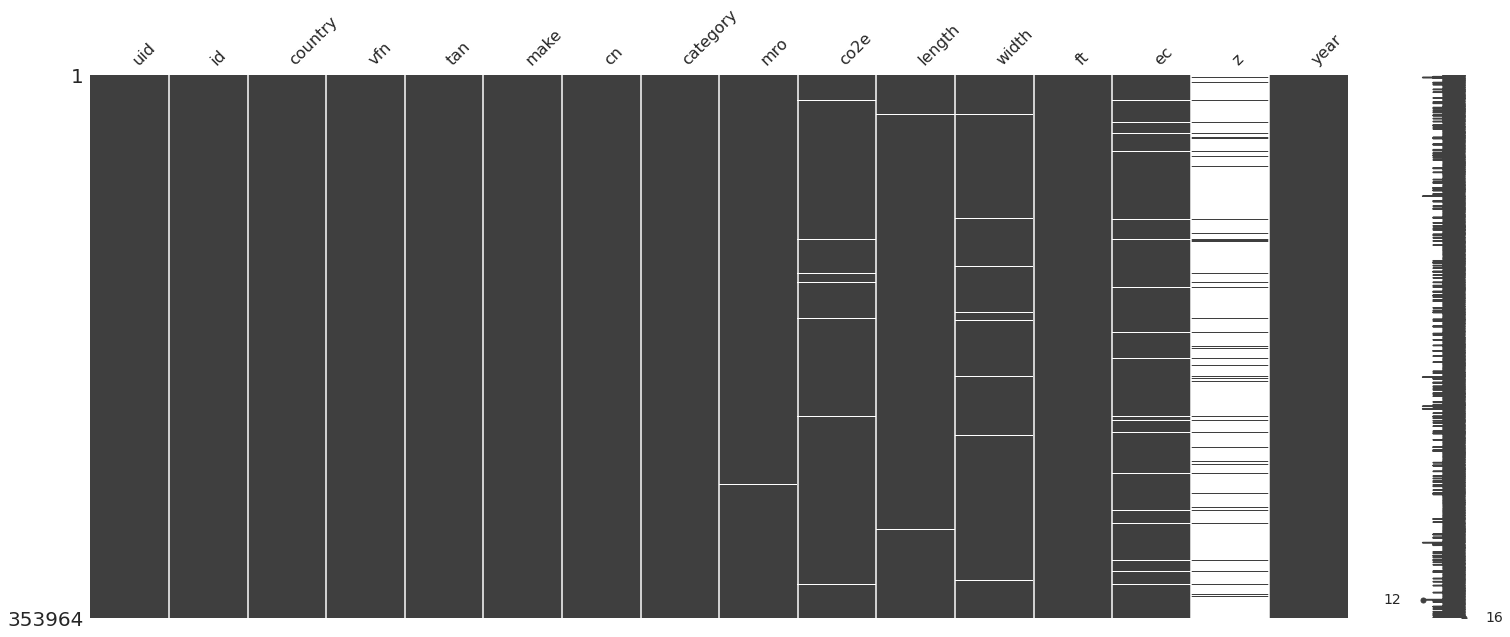

In [0]:
mso.matrix(co2_vehicles_df.sample(353964))

__autre façon pour visulisé les valeurs manquantes__ 👇

Out[409]: <AxesSubplot:>

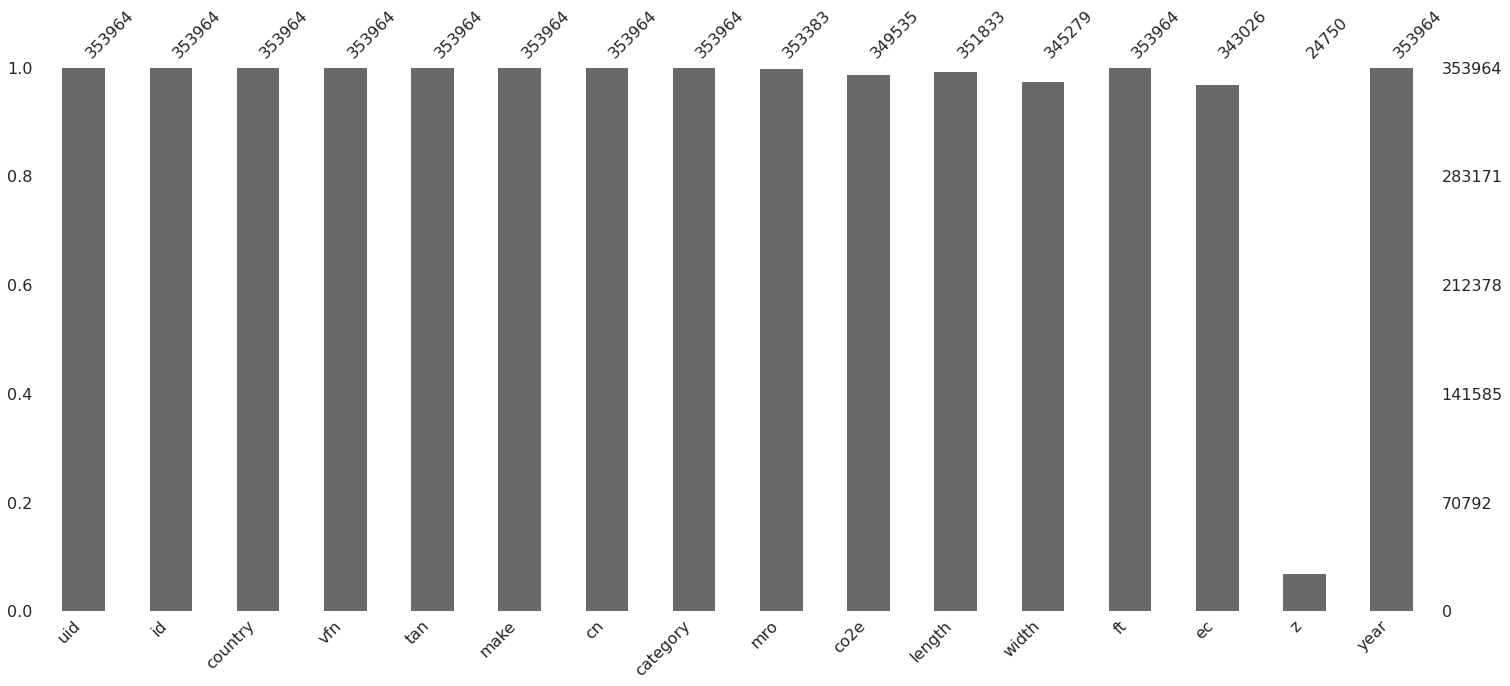

In [0]:
mso.bar(co2_vehicles_df.sample(353964))

__Vérification__ de notre intréprétation: 👇

Pour vérifier les valeurs renseignées de type de carburant, on éxecute ces codes: 👇

In [0]:
co2_vehicles_df['ft'].value_counts()

Out[410]: Diesel             165316
Petrol             160266
Petrol/electric     12605
Electric            10962
Gas                  1656
LPG                  1591
Diesel/electric       988
Biomethane            534
Biopetrol              46
Name: ft, dtype: int64

In [0]:
# Filtrer les catégories spécifiques et calculer la somme des valeurs associées
ft_electric = ['Petrol/electric', 'Diesel/electric', 'Electric']
electric_vehicules= co2_vehicles_df[co2_vehicles_df['ft'].isin(ft_electric)]['ft'].count()

print(f"Le nombre de véhicules électriques : {electric_vehicules}")

Le nombre de véhicules électriques : 24555


Ces résultats semblent __cohérents__ avec notre interprétation précédente ! En effet, on remarque que le nombre de valeurs renseignées dans la colonne __'z'__ équivaut au nombre de véhicules électriques.

In [0]:
# Liste des carburants thermiques
ft_thermic = ['Petrol', 'Diesel', 'Biomethane', 'Biopetrol', 'Gas', 'LPG']

# Filtrer les lignes avec NaN dans la colonne 'co2e' et 'ft' correspondant à des carburants thermiques
result_df = co2_vehicles_df[(co2_vehicles_df['co2e'].isna()) & (co2_vehicles_df['ft'].isin(ft_thermic))]

# Affichage du DataFrame résultant
print(result_df)


Empty DataFrame
Columns: [uid, id, country, vfn, tan, make, cn, category, mro, co2e, length, width, ft, ec, z, year]
Index: []


## 🔍 <span style="color:blue">**Gérer les valeurs problématiques**</span>

Il peut y avoir toutes sortes d'erreurs dans un jeu de données: une chaine de caractère à la place d'une valeur numérique, une valeur manifestement fausse... </br>
On peut commencer par voir les types des élements des différentes colonnes

In [0]:
co2_vehicles_df.dtypes

Out[413]: uid           int64
id            int64
country      object
vfn          object
tan          object
make         object
cn           object
category     object
mro         float64
co2e        float64
length      float64
width       float64
ft           object
ec          float64
z           float64
year          int64
dtype: object

## 💯 <span style="color:red">**Valeurs uniques**</span>


les variables uniques sont essentiels pour avoir des données fiables.

## <span style="color:green">**#Country**</span>

In [0]:
# Vérification des variables uniques dans le pays
print(co2_vehicles_df['country'].unique())

['AT' 'CZ' 'ES' 'DE' 'FR' 'NL' 'HU' 'IT' 'PL' 'SE' 'BE']


In [0]:
nb_country = len(co2_vehicles_df['country'].unique())
nb_country

Out[415]: 11

❗ Nos données se focalisent sur 11 pays de l'union européenne

## <span style="color:green">**#Fuel type**</span>

In [0]:
print(co2_vehicles_df['ft'].unique())

['Electric' 'Petrol/electric' 'Diesel/electric' 'Diesel' 'Petrol' 'LPG'
 'Gas' 'Biomethane' 'Biopetrol']


In [0]:
nb_fueltype = len(co2_vehicles_df['ft'].unique())
nb_fueltype

Out[417]: 9

## <span style="color:green">**#Make**</span>

In [0]:
# vérifier les variables uniques dans make
print(co2_vehicles_df['make'].unique())

['VOLKSWAGEN' 'THINK' 'KIA' 'BMW' 'NISSAN' 'JAC' 'TESLA'
 'SHENZHEN BYD AUTO' 'MIA' 'AIWAYS' 'LUMENEO' 'HYUNDAI' 'OPEL' 'RENAULT'
 'VOLVO' 'GOUPIL' 'SMART' 'HONDA' '' 'MERCEDES-BENZ' 'FORD' 'MITSUBISHI'
 'PORSCHE' 'AUDI' 'MINI' 'TOYOTA' 'LAND ROVER' 'CHEVROLET' 'CITROEN'
 'PEUGEOT' 'SUZUKI' 'JEEP' 'JAGUAR' 'BENTLEY' 'MG' 'DS' 'SKODA' 'SEAT'
 'MCLAREN' 'FIAT' 'MAZDA' 'POLESTAR' 'FERRARI' 'CUPRA' 'MAXUS' 'SKYWELL'
 'DACIA' 'BYD' ' ' 'LEXUS' 'SSANGYONG' 'ŠKODA' 'DFSK' 'LEVC' 'FISKER'
 'SUDA' 'E.GO' 'ZHIDOU' 'ELARIS' 'ZHIDOU  ZD' 'GUMPERT AIWAYS AUTOMOBILE'
 'MCC SMART' 'GREEN TOUR' 'LYNK&CO' 'TAIQI' 'BLUECAR' 'BEE BEE'
 'DR MOTOR COMPANY' 'MAN' 'ZOTYE' 'XPENG' 'SERES' 'PORSCHE 2220549'
 'PIAGGIO' 'MUP' 'MUP TECHNOLOGIES' 'EVUM MOTORS' 'DONGFENG' 'DAFUDI'
 'LIGIER PROFESSIONAL' 'ALKE' 'OZ TRUCKS S.R.L.' 'FENGCHUEN NEXTEM'
 'ADDAX MOTORS' 'SOMMER GMBH' 'POLARIS' 'ABT E-LINE' 'STREETSCOOTER'
 'ESAGONO ENERGIA' 'NEXTEM' 'ABT E-LINE GMBH' 'IGH IND GONZLEZ HNOS SA'
 'CAYVOL' 'TRPC' 'TALLERES OR

In [0]:
nb_make = len(co2_vehicles_df['make'].unique())
nb_make

Out[419]: 305

Il est observé la présence de la marque 'HYUNDAI' et 'hyundai'. Pour un humain, il est évident qu'il s'agit en réalité d'une seule marque. Cependant, pour les ordinateurs, cette distinction n'est pas claire, et il est nécessaire d'uniformiser la manière dont les chaînes de caractères sont écrites. Cette standardisation dépend des valeurs présentes dans le jeu de données, mais elle implique souvent les problèmes récurrents suivants : les différences entre majuscules et minuscules, les tirets, et les espaces multiples.

Pour remédier à cela, toutes les valeurs de ces variables sont transformées en minuscules, les tirets sont remplacés par des espaces, et les espaces multiples sont supprimés. De plus, la marque 'inconnue' est attribuée pour les valeurs non renseignées (NaN).

## <span style="color:green">**#CN**</span>

In [0]:
# 50 premières valeurs uniques de la colonne 'cn'
print(co2_vehicles_df['cn'].unique()[:100])


['UP!' 'TH!NK CITY' 'SOULEV' 'I3' 'E-NV200' 'IEV7S' '' 'BYD E6' 'iX3'
 'MIA' 'U5' 'NEOMA' 'KONA' 'SOUL' 'MODEL S' 'ZOE' 'GOLF' 'V60' 'G6'
 'FORFOUR ED' 'CEED' 'HONDA E' 'i3s' 'I8' 'GLE' 'FOCUS ELECTRIC' 'PASSAT'
 'OUTLANDER PHEV 20 4WD INSTYLE' '740Le xDrive iPerformance' '330e'
 '225XE ACTIVE TOURER' '225xe iPerformance' 'NISSAN E-NV200'
 'PANAMERA 4 E-HYBRID' 'CAYENNE S E-HYBRID' 'IONIQ' 'S 500 E' 'Q7 E-TRON'
 'OUTLANDER PHEV 20 4WD INTENSE' 'C 350 E' 'ELECTRIC DRIVE' 'B 250 E'
 'GLC 350 E 4MATIC' 'E 350 E' '740E G11 XB1' '330E IPERFORMANCE LIM.F30'
 'X5 XDRIVE40E IPERFORMANCE F15' 'MITSUBISHI I-MIEV'
 'FORTWO ELECTRIC DRIVE' 'GLE 500 E 4MATIC' 'A3 SPORTBACK E-TRON' 'i3s 94'
 'BMWI I8 COUPE XB2 I12' '225XE ACTIVE TOURER IPERFORMAN'
 'MINI COOPER S E ALL4 COUNTRYMA' '530E IPERFORMANCE LIM. G30'
 '530e iPerformance' 'E-CELL' 'XL1' 'PRIUS PLUS'
 'PRIUS 18 VVT-I PLUGIN HYBRID' 'NISSAN LEAF' 'NISSAN LEAF 24KWH'
 'Nissan Leaf 30kWh' 'RANGE ROVER SPORT 2.0 SI4 PHEV' 'CAYENNE E-HYBRID'
 'VOL

In [0]:
nb_categories = len(co2_vehicles_df['cn'].unique())
nb_categories

Out[421]: 2476

__Application de l'uniformisation pour les marques et les modéles 👇:__

In [0]:
import re  # Importer le module re pour les expressions régulières

# Définition de la fonction d'uniformisation
def uniformisation(mots):
    words = mots.upper()  # Convertir en minuscules
    characters_to_replace = ['-', '(', ')']  # Liste des caractères à remplacer
    replacement_char = ' '  # Caractère de remplacement
    for char in characters_to_replace:
        words = words.replace(char, replacement_char)  # Remplacer chaque caractère par l'espace
    words = re.sub(" +", " ", words)  # Remplacer les espaces multiples par un seul espace
    words = words.replace("ô", "oe")  # Remplacer 'ô' par 'oe'
    words = words.replace("?", "oe")  # Remplacer '?' par 'oe'
    words = words.replace("!", "I")  
    return words

# Appliquer la fonction d'uniformisation à la colonne 'make' du DataFrame
co2_vehicles_df['make'] = co2_vehicles_df['make'].apply(uniformisation)


In [0]:
# vérifier les variables uniques dans make
print(co2_vehicles_df['make'].unique())

['VOLKSWAGEN' 'THINK' 'KIA' 'BMW' 'NISSAN' 'JAC' 'TESLA'
 'SHENZHEN BYD AUTO' 'MIA' 'AIWAYS' 'LUMENEO' 'HYUNDAI' 'OPEL' 'RENAULT'
 'VOLVO' 'GOUPIL' 'SMART' 'HONDA' '' 'MERCEDES BENZ' 'FORD' 'MITSUBISHI'
 'PORSCHE' 'AUDI' 'MINI' 'TOYOTA' 'LAND ROVER' 'CHEVROLET' 'CITROEN'
 'PEUGEOT' 'SUZUKI' 'JEEP' 'JAGUAR' 'BENTLEY' 'MG' 'DS' 'SKODA' 'SEAT'
 'MCLAREN' 'FIAT' 'MAZDA' 'POLESTAR' 'FERRARI' 'CUPRA' 'MAXUS' 'SKYWELL'
 'DACIA' 'BYD' ' ' 'LEXUS' 'SSANGYONG' 'ŠKODA' 'DFSK' 'LEVC' 'FISKER'
 'SUDA' 'E.GO' 'ZHIDOU' 'ELARIS' 'ZHIDOU ZD' 'GUMPERT AIWAYS AUTOMOBILE'
 'MCC SMART' 'GREEN TOUR' 'LYNK&CO' 'TAIQI' 'BLUECAR' 'BEE BEE'
 'DR MOTOR COMPANY' 'MAN' 'ZOTYE' 'XPENG' 'SERES' 'PORSCHE 2220549'
 'PIAGGIO' 'MUP' 'MUP TECHNOLOGIES' 'EVUM MOTORS' 'DONGFENG' 'DAFUDI'
 'LIGIER PROFESSIONAL' 'ALKE' 'OZ TRUCKS S.R.L.' 'FENGCHUEN NEXTEM'
 'ADDAX MOTORS' 'SOMMER GMBH' 'POLARIS' 'ABT E LINE' 'STREETSCOOTER'
 'ESAGONO ENERGIA' 'NEXTEM' 'ABT E LINE GMBH' 'IGH IND GONZLEZ HNOS SA'
 'CAYVOL' 'TRPC' 'TALLERES ORD

In [0]:
nb_make = len(co2_vehicles_df['make'].unique())
nb_make

Out[424]: 303

In [0]:
# Appliquer la fonction d'uniformisation à la colonne 'make' du DataFrame
co2_vehicles_df['cn'] = co2_vehicles_df['cn'].apply(uniformisation)

In [0]:
# 50 premières valeurs uniques de la colonne 'cn'
print(co2_vehicles_df['cn'].unique()[:100])

['UPI' 'THINK CITY' 'SOULEV' 'I3' 'E NV200' 'IEV7S' '' 'BYD E6' 'IX3'
 'MIA' 'U5' 'NEOMA' 'KONA' 'SOUL' 'MODEL S' 'ZOE' 'GOLF' 'V60' 'G6'
 'FORFOUR ED' 'CEED' 'HONDA E' 'I3S' 'I8' 'GLE' 'FOCUS ELECTRIC' 'PASSAT'
 'OUTLANDER PHEV 20 4WD INSTYLE' '740LE XDRIVE IPERFORMANCE' '330E'
 '225XE ACTIVE TOURER' '225XE IPERFORMANCE' 'NISSAN E NV200'
 'PANAMERA 4 E HYBRID' 'CAYENNE S E HYBRID' 'IONIQ' 'S 500 E' 'Q7 E TRON'
 'OUTLANDER PHEV 20 4WD INTENSE' 'C 350 E' 'ELECTRIC DRIVE' 'B 250 E'
 'GLC 350 E 4MATIC' 'E 350 E' '740E G11 XB1' '330E IPERFORMANCE LIM.F30'
 'X5 XDRIVE40E IPERFORMANCE F15' 'MITSUBISHI I MIEV'
 'FORTWO ELECTRIC DRIVE' 'GLE 500 E 4MATIC' 'A3 SPORTBACK E TRON' 'I3S 94'
 'BMWI I8 COUPE XB2 I12' '225XE ACTIVE TOURER IPERFORMAN'
 'MINI COOPER S E ALL4 COUNTRYMA' '530E IPERFORMANCE LIM. G30'
 '530E IPERFORMANCE' 'E CELL' 'XL1' 'PRIUS PLUS'
 'PRIUS 18 VVT I PLUGIN HYBRID' 'NISSAN LEAF' 'NISSAN LEAF 24KWH'
 'NISSAN LEAF 30KWH' 'RANGE ROVER SPORT 2.0 SI4 PHEV' 'CAYENNE E HYBRID'
 'VOL

## 📝 ÉTAPE 3 : Analyse descriptive et inférentielle de données

Notre application aura pour but de proposer à l'utilisateur de saisir les caractéristiques du véhicule ( pays, marque, modèle et année),afin de recevoir une prédiction précise des gaz à effet de serre (GES) émis par ce véhicule. </br>
Nous allons donc dans un premier temps décrire les données afin de voir si on peut produire une application à partir des différentes variables.

L'analyse descriptive varie en fonction du type de variables présentes dans un dataset. Il est courant de diviser les variables en deux catégories telles que les variables numériques (quantitatives) et les variables catégoriques (qualitatives): </br>
✔️__Variables numériques (quantitatives)__ :</br>
Pour les variables numériques, une analyse descriptive typique inclut des mesures telles que :</br>

- __Moyenne__ : représente la valeur moyenne des données.</br>
- __Médiane__ : représente la valeur centrale des données.</br>
- __Écart-type__ : mesure la dispersion des données autour de la moyenne.</br>
- __Minimum et maximum__ : les valeurs les plus basses et les plus élevées.</br>
- __Quartiles__ : valeurs qui divisent l'ensemble de données en quatre parties égales.</br>

✔️__Variables catégoriques (qualitatives)__ :</br>
Pour les variables catégoriques, une analyse descriptive implique souvent :</br>

- __Nombre de catégories et leurs fréquences__ : compter le nombre d'occurrences de chaque catégorie.</br>
- __Mode__ : représentant la catégorie la plus fréquente.</br>

Pour identifier et afficher le nombre de variables numériques et le nombre de variables catégoriques présentes dans le DataFrame en éxécute ce script 👇.

In [0]:
numerical_features = co2_vehicles_df.dtypes[co2_vehicles_df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_features))

categorical_features = co2_vehicles_df.dtypes[co2_vehicles_df.dtypes == "object"].index
print("Number of categorical features:", len(categorical_features))

Number of Numerical features:  9
Number of categorical features: 7


##  <span style="color:red">**🔶 Variables Qualitative**</span>

### 🔻 Analyse statistique inférentielle

## <span style="color:green">**#Country**</span>

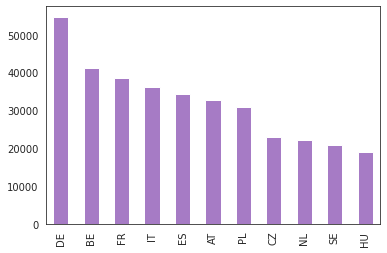

In [0]:
counts = co2_vehicles_df['country'].value_counts().plot(kind='bar')

## <span style="color:green">**#ft**</span>

In [0]:
# Fonction pour déterminer la catégorie en fonction du type de carburant
def categoriser_vehicule(row):
    if row in ['Electric', 'Petrol/electric', 'Diesel/electric']:
        return 'Électrique'
    else:
        return 'Thermique'
# Création d'une nouvelle série en appliquant la fonction categoriser_vehicule à la colonne 'ft'
categories = co2_vehicles_df['ft'].apply(categoriser_vehicule)


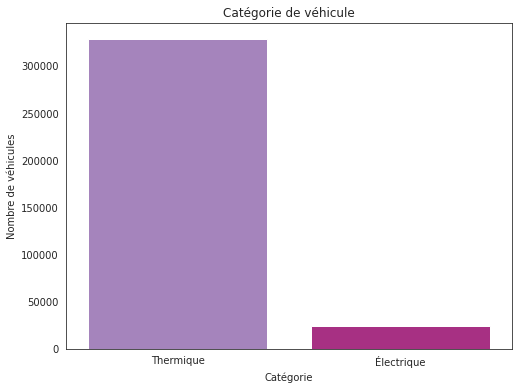

In [0]:
# Compter les valeurs de chaque catégorie
comptage = categories.value_counts()

# Créer un diagramme à barres avec seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=comptage.index, y=comptage.values)
plt.title('Catégorie de véhicule')
plt.xlabel('Catégorie')
plt.ylabel('Nombre de véhicules')
plt.show()


##  <span style="color:red">**🔶 Variables Quantitative**</span>

### 🔻 Analyse statistique descriptive

Il est crucial d'analyser la distribution des variables quantitatives afin de détecter la présence de valeurs aberrantes évidentes. </br>
On peut regrouper dans un tableau les principaux statistiques concernant les variables qui nous intéressent: 

In [0]:
# Aperçu des différentes distributions statistiques 
co2_vehicles_df.describe().T

,count,mean,std,min,25%,50%,75%,max
uid,353964.0,2.376821e+05,1.456985e+05,1.0,100704.25,235216.5,376228.25,4.701680e+05
id,353964.0,1.827796e+07,2.093257e+07,10.0,3644129.25,9466439.5,15495433.75,1.284691e+09
mro,353383.0,1.675819e+03,3.791215e+02,600.0,1395.00,1612.0,1905.00,4.610000e+03
co2e,349535.0,1.641120e+02,6.082739e+01,0.0,133.00,154.0,191.00,5.720000e+02
length,351833.0,2.834154e+03,3.694849e+02,1000.0,2639.00,2729.0,2932.00,6.585000e+03
width,345279.0,1.594216e+03,1.068498e+02,796.0,1545.00,1577.0,1622.00,4.035000e+03
ec,343026.0,1.890464e+03,6.940680e+02,0.0,1498.00,1968.0,1997.00,7.993000e+03
z,24750.0,1.828866e+02,7.012824e+01,0.0,149.00,168.0,211.00,1.725000e+03
year,353964.0,2.019932e+03,1.019732e+00,2010.0,2019.00,2020.0,2021.00,2.021000e+03


__Vérification:__

In [0]:
co2_vehicles_df[co2_vehicles_df['ec'] == co2_vehicles_df['ec'].max()]

,uid,id,country,vfn,tan,make,cn,category,mro,co2e,length,width,ft,ec,z,year
64551,98531,51966580,DE,ND,E1*KS07/46*0008*12,BUGATTI,BUGATTI CHIRON,M1,2070.0,506.0,2711.0,1747.0,Petrol,7993.0,NaN,2021
64552,98532,51966575,DE,ND,E1*KS07/46*0008*13,BUGATTI,BUGATTI CHIRON,M1,2070.0,506.0,2711.0,1747.0,Petrol,7993.0,NaN,2021
64553,98533,51966572,DE,ND,E1*KS07/46*0008*15,BUGATTI,BUGATTI CHIRON,M1,2070.0,572.0,2711.0,1776.0,Petrol,7993.0,NaN,2021
64554,98534,51966582,DE,ND,E1*KS07/46*0008*17,BUGATTI,BUGATTI CHIRON,M1,2070.0,487.0,2711.0,1749.0,Petrol,7993.0,NaN,2021
80737,120489,2129461,DE,,E1*KS07/46*0008*13,BUGATTI,BUGATTI CHIRON,M1,2070.0,554.0,2711.0,1747.0,Petrol,7993.0,NaN,2020
84981,130684,8651808,DE,,E1*KS07/46*0008*10,BUGATTI,BUGATTI CHIRON,M1,2070.0,553.0,2711.0,1747.0,Petrol,7993.0,NaN,2020
84982,130685,8651809,DE,,E1*KS07/46*0008*12,BUGATTI,BUGATTI CHIRON,M1,2070.0,554.0,2711.0,1747.0,Petrol,7993.0,NaN,2020
91951,146376,4898520,DE,,E1*KS07/46*0008*09,BUGATTI,BUGATTI CHIRON,M1,2070.0,553.0,2711.0,1747.0,Petrol,7993.0,NaN,2019
91952,146377,4898519,DE,,E1*KS07/46*0008*10,BUGATTI,BUGATTI CHIRON,M1,2070.0,553.0,2711.0,1747.0,Petrol,7993.0,NaN,2019
91953,146378,4898522,DE,,E1*KS07/46*0008*12,BUGATTI,BUGATTI CHIRON,M1,2070.0,553.0,2711.0,1747.0,Petrol,7993.0,NaN,2019


Donc, les valeurs maximales pour __'ec'__, __'mro'__, __'length'__ et __'width'__ semblent être logiques étant donné que nous avons deux types de véhicules en termes de taille __(vans et véhicules légers)__

Les graphiques sont souvent plus explicites qu'un simple tableau de valeurs. Les histogrammes et les boxplots se révèlent être des outils très efficaces pour représenter visuellement les données continues.

## 🀄 <span style="color:red">**Box plot**</span>

Pour voir la dispersion de la variable 'co2e'

Out[433]: Text(0.5, 1.0, 'Émission de CO2e')

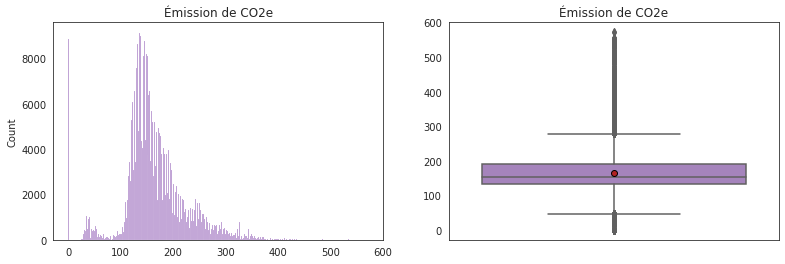

In [0]:
# un point rouge qui indiquera la moyenne dans les boxplots
meanprops = {'marker': 'o', 'markeredgecolor': 'black', 'markerfacecolor': 'firebrick'}
plt.figure(figsize=(13, 4))

plt.subplot(1, 2, 1)
sns.histplot(data=co2_vehicles_df, x='co2e').set(xlabel='')
plt.title('Émission de CO2e')

plt.subplot(1, 2, 2)
sns.boxplot(data=co2_vehicles_df[['co2e']], showmeans=True, meanprops=meanprops).set(xticklabels=[])
plt.title('Émission de CO2e')


Je veux regarder la dispersion des émissions de CO2 au sein de chaque marque de véhicule 👇.

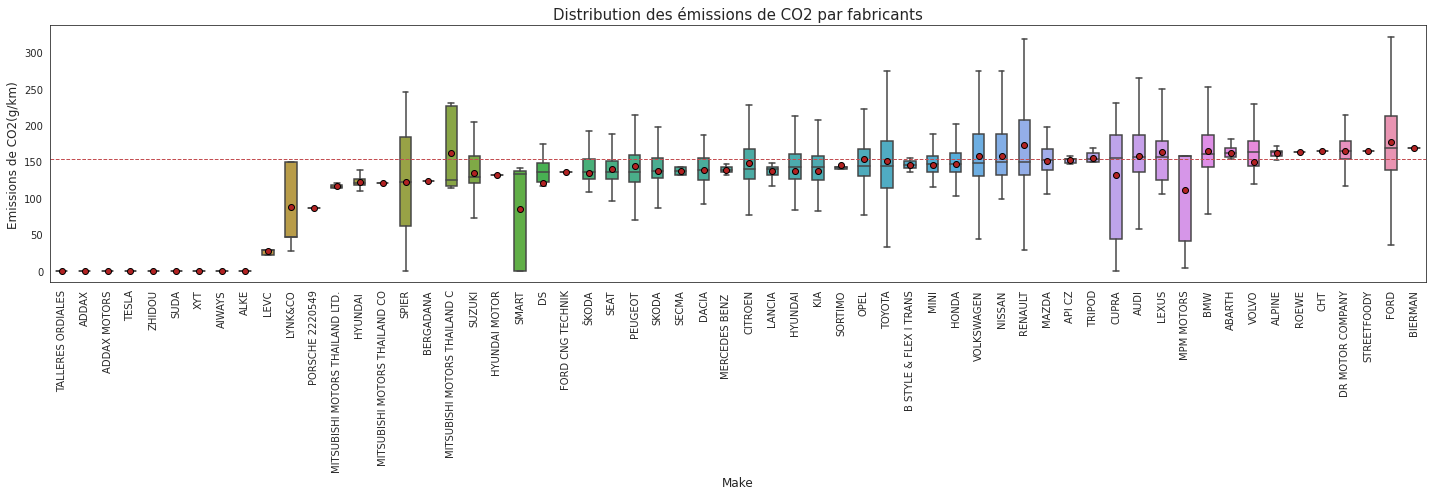

In [0]:
plt.figure(figsize=(20,7))
order = co2_vehicles_df.groupby("make")["co2e"].median().sort_values(ascending=True)[40:100].index
sns.boxplot(x="make", y="co2e", data=co2_vehicles_df, order=order, width=0.5, showfliers=False, showmeans=True, meanprops=meanprops)
plt.title("Distribution des émissions de CO2 par fabricants", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Make", fontsize=12)
plt.ylabel("Emissions de CO2(g/km)", fontsize=12)
plt.axhline(co2_vehicles_df["co2e"].median(),color='r',linestyle='dashed',linewidth=1)
plt.tight_layout()
plt.show()


L'observation de la dispersion des émissions de CO2 par marque de véhicule révèle des tendances distinctes. Certaines marques présentent des émissions très uniformes, ce qui suggère une cohérence dans les niveaux d'émissions. Ainsi, lorsque les utilisateurs saisissent des caractéristiques de ces marques dans l'application, les recommandations pourraient être relativement similaires, car les émissions restent stables pour ces marques spécifiques.

En revanche, pour d'autres marques, la variabilité des émissions de CO2 est plus étendue. En effet, l'application pourrait suggérer des options plus diverses ou spécifiques pour aider à réduire les émissions. Cette approche prendrait en compte la plus grande diversité des émissions entre les véhicules de ces marques, offrant ainsi des recommandations plus précises et adaptées aux besoins individuels des utilisateurs.

En fait, en examinant le boxplot, on a eu l'intuition qu'il pourrait exister une relation entre la marque de véhicule et les émissions de CO2. Cependant, pour aborder cette question de manière rigoureuse et répondre de façon précise, il est impératif d'effectuer des tests statistiques appropriés

## 📉  <span style="color:blue">**Corrélation**</span>


In [0]:
# Corrélation entre les features et les étiquêtes

corrT= co2_vehicles_df.corr()
corrT

,uid,id,mro,co2e,length,width,ec,z,year
uid,1.000000,-0.149474,0.236855,0.208751,0.364740,0.175199,0.034307,0.073105,0.105040
id,-0.149474,1.000000,-0.044166,-0.152938,-0.118156,-0.063633,-0.001807,0.024436,0.569097
mro,0.236855,-0.044166,1.000000,0.525296,0.736212,0.551885,0.644171,0.415956,0.147678
co2e,0.208751,-0.152938,0.525296,1.000000,0.533633,0.384616,0.630051,-0.064899,0.006850
length,0.364740,-0.118156,0.736212,0.533633,1.000000,0.378244,0.329155,0.368400,0.185753
width,0.175199,-0.063633,0.551885,0.384616,0.378244,1.000000,0.319765,0.270355,0.030863
ec,0.034307,-0.001807,0.644171,0.630051,0.329155,0.319765,1.000000,0.168436,0.041931
z,0.073105,0.024436,0.415956,-0.064899,0.368400,0.270355,0.168436,1.000000,0.216039
year,0.105040,0.569097,0.147678,0.006850,0.185753,0.030863,0.041931,0.216039,1.000000


Maintenant on va comprendre les relations linéaires potentielles entre la variable __"co2"__ (émissions de dioxyde de carbone) et les autres variables (features)

In [0]:
corrT['co2e'].sort_values()

Out[436]: id       -0.152938
z        -0.064899
year      0.006850
uid       0.208751
width     0.384616
mro       0.525296
length    0.533633
ec        0.630051
co2e      1.000000
Name: co2e, dtype: float64

Et on peut avec le code ci-dissous se concentrer sur les colonnes dont la valeur absolue est corrélée à __co2__ de plus de __50%__.

In [0]:
cols50 = corrT[abs(corrT['co2e']) > 0.5].index.tolist()
cols50

Out[437]: ['mro', 'co2e', 'length', 'ec']

Pour une compréhension visuelle plus rapide on utilise le heatmap

Out[438]: Text(0.5, 1.0, 'Correlation')

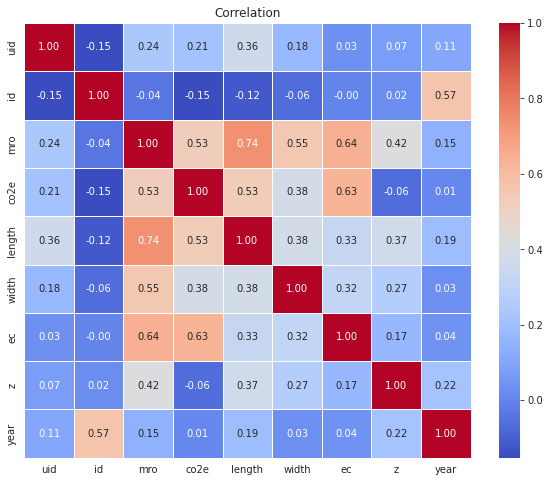

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = co2_vehicles_df.corr()

plt.rcParams['figure.figsize']=(10,8)
sns.heatmap(corr, cmap='coolwarm', linewidth=0.5, fmt='0.2f', annot=True)

plt.title('Correlation')

Il semble y avoir une relation significative entre la taille des véhicules ('mro', 'length' et 'width') et les émissions de co2e! </br>
Cette corrélation suggère que les véhicules de différentes tailles ont tendance à émettre des quantités variables de co2e, probablement en raison des différences dans les moteurs, les technologies et les performances énergétiques associées à chaque catégorie de taille de véhicule.

##   <span style="color:green">**#Make**</span>


## 📈 <span style="color:red">**Displot**</span>

![](https://i.pinimg.com/564x/e1/f0/b2/e1f0b20eb0773915fc6e9b91909adfa3.jpg)

L'asymétrie (ou skewness en anglais) mesure le degré de distorsion par rapport à la courbe en cloche symétrique ou à la distribution normale.

. Une distribution symétrique a une asymétrie de 0.

. Asymétrie positive lorsque la moyenne et la médiane sont supérieures au mode.

. Asymétrie négative lorsque la moyenne et la médiane sont inférieures au mode.


L'aplatissement (Le kurtosis) est la mesure des valeurs aberrantes présentes dans la distribution.

Il existe trois types d'aplatissement : mesokurtique, leptokurtique et platykurtique.

. Une distribution mesokurtique indique un aplatissement en excès de zéro. Cela signifie que les données suivent une distribution normale.

. Une distribution leptokurtique montre un aplatissement en excès positif, ce qui signifie qu'elle a des queues lourdes, c'est-à-dire qu'il existe des valeurs aberrantes importantes.

. Une distribution platykurtique montre un aplatissement en excès négatif.

/databricks/python/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



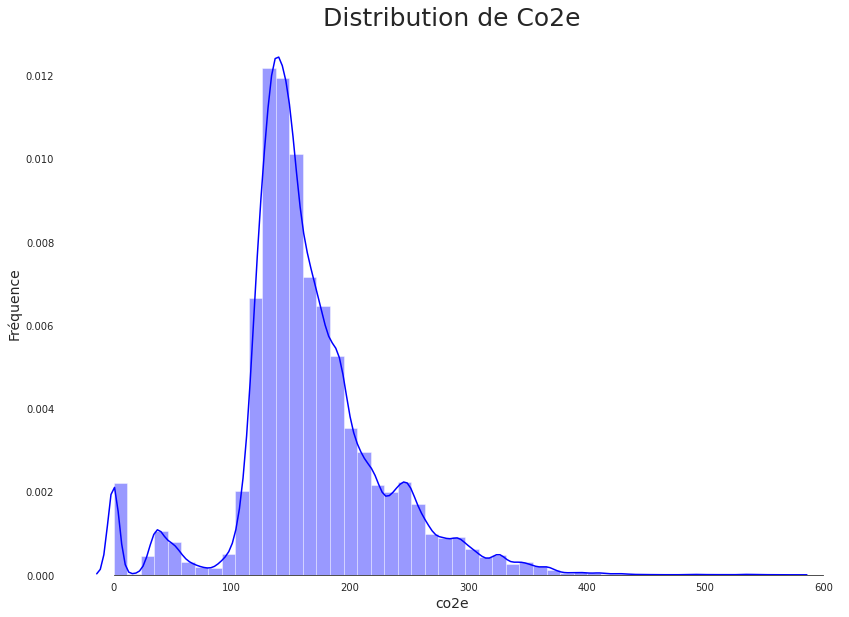

In [0]:
sns.set_style("white")
sns.set_color_codes(palette="deep")
f, ax = plt.subplots(figsize=(14, 10))

sns.distplot(co2_vehicles_df['co2e'], color="blue")
ax.set_ylabel("Fréquence", fontsize=14)  # Taille de police pour l'axe Y
ax.set_xlabel("co2e", fontsize=14)        # Taille de police pour l'axe X
ax.set_title("Distribution de Co2e", fontsize=25)
sns.despine(trim=True, left=True)
plt.show()


Le graphique présente __une asymétrie positive__ ainsi qu'__une distribution leptokurtique__.

In [0]:
print("Skewness : %f" % co2_vehicles_df['co2e'].skew() )
print("Kurtosis : %f" % co2_vehicles_df['co2e'].kurt())

Skewness : 0.428604
Kurtosis : 2.347985


* __L'asymétrie est légèrement positive (0.425296)__ pour la variable "co2e", révélant une concentration légèrement plus importante des données vers les valeurs inférieures de "co2e", avec quelques valeurs plus élevées étalées vers la droite. Cette tendance peut être expliquée par l'absence d'émissions directes de GES pour les véhicules électriques et les émissions très faibles pour les véhicules hybrides, principalement alimentés par des moteurs électriques.
* __L'applatissement est de 2.341100__ pour la variable "co2e". Cette valeur indique un aplatissement positif de la distribution, suggérant que les valeurs de "co2e" sont relativement plus concentrées autour de la moyenne avec des queues plus épaisses par rapport à une distribution normale. Cette variation est étroitement liée à la diversité des tailles de véhicules, qu'ils soient des vans ou des véhicules légers.

## 📊 <span style="color:red">**Histogramme**</span>


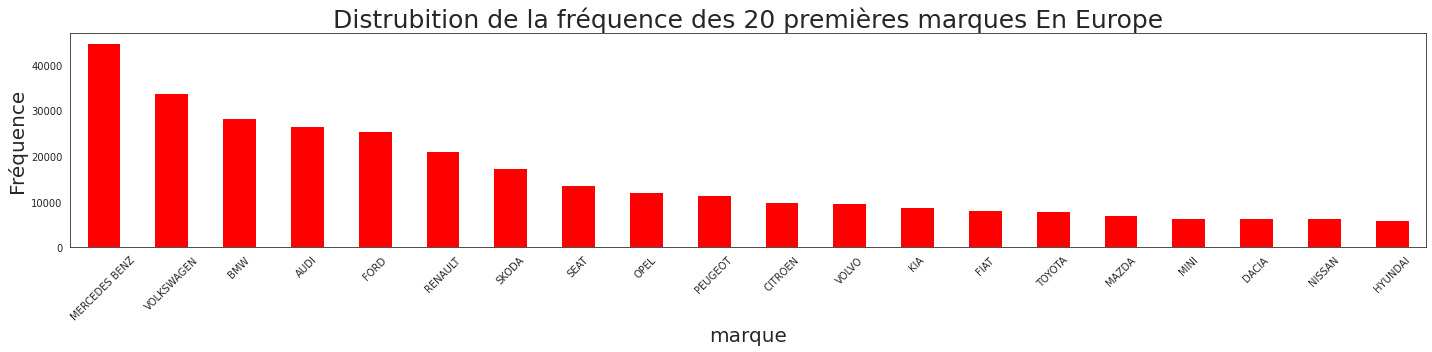

In [0]:
# Trier les fréquences de fabricants par ordre décroissant
make_counts = co2_vehicles_df['make'].value_counts().sort_values(ascending=False)

# Extraire les 20 marques les plus courantes et leurs fréquences
top_20_makes = make_counts[:20]

# Tracer le graphique pour les 20 premières marques
plt.figure(figsize=(20, 5))
top_20_makes.plot(kind='bar', color='red')
plt.title('Distrubition de la fréquence des 20 premières marques En Europe', fontsize=25)
plt.xlabel('marque', fontsize=20)
plt.ylabel('Fréquence', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



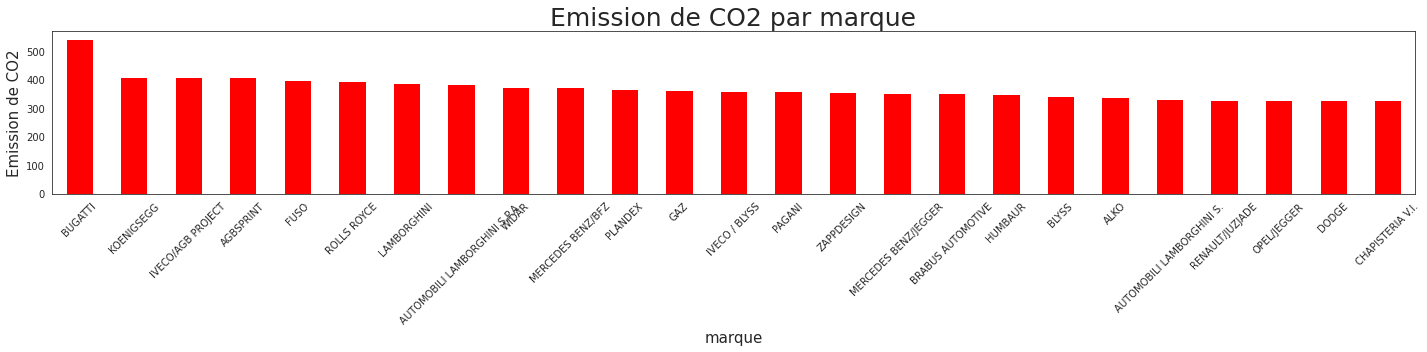

In [0]:
# Visualisation relative à l’émission de CO2
plt.figure(figsize=(20,5))

co2_vehicles_df.groupby('make')['co2e'].mean().sort_values(ascending=False)[:25].plot(kind='bar', color='red')

plt.title('Emission de CO2 par marque', fontsize=25)
plt.xlabel('marque', fontsize=15)
plt.ylabel('Emission de CO2', fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


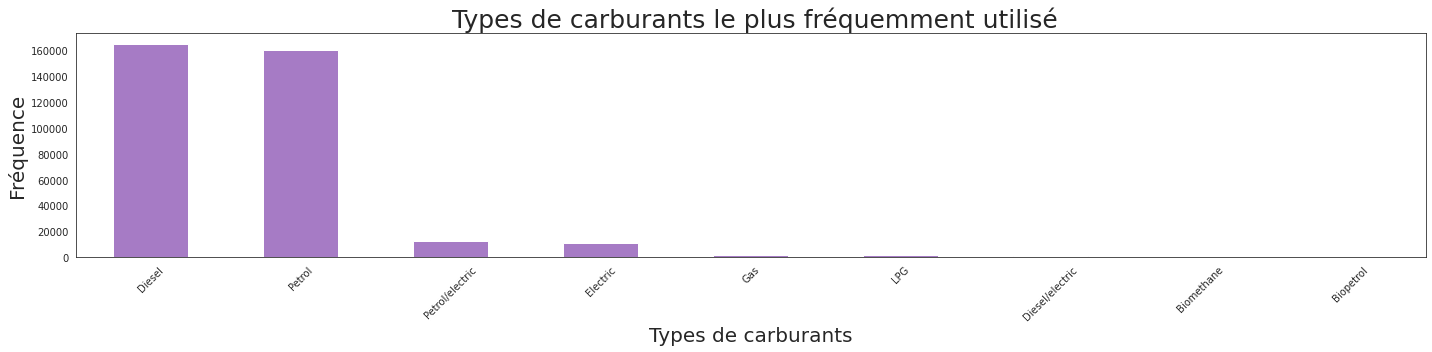

In [0]:
plt.figure(figsize=(20,5))

co2_vehicles_df.groupby('ft')['ft'].count().sort_values(ascending=False).plot(kind='bar')

plt.title(' Types de carburants le plus fréquemment utilisé', fontsize=25)
plt.xlabel('Types de carburants', fontsize=20)
plt.ylabel ('Fréquence', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()